In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Design Choices Experiments

In [55]:
results = pd.read_csv('/Users/nicolasvila/workplace/uni/tfg_v2/tests/tune_results_hebo_512.csv')


## A. 1: Network Architecture

In [59]:
runs_1 = results.drop(['timestamp', 
                        'checkpoint_dir_name', 
                        'done',
                        'training_iteration',
                        'date',
                        'time_this_iter_s',
                        'time_total_s',
                        'pid',
                        'hostname',
                        'node_ip',
                        'time_since_restore',
                        'iterations_since_restore',
                        'config/env_id',
                        'config/exp_name',
                        'config/seed',
                        'config/torch_deterministic',
                        'config/cuda',
                        'config/track',
                        'config/wandb_project_name',
                        'config/wandb_entity',
                        'config/capture_video',
                        'config/__trial_index__',
                        'config/total_timesteps',
                        'config/q_histogram',
                        'config/num_iterations',
                        'config/num_steps',
                        'config/tau',
                        'Unnamed: 0',
                        'config/eps',
                        'config/target_network',
                        'config/target_network_frequency',
                        'config/minibatch_size',
                        'config/eta',
                        'config/q_optimizer',
                        'config/actor_optimizer',
                        'logdir',
                        'trial_id',
                        ], axis=1, inplace=False)

runs_1.reset_index(drop=True, inplace=True)

averages = runs_1.groupby(runs_1.index // 4).agg({'reward': 'mean', **{col: 'first' for col in runs_1.columns if col != 'reward'}}).reset_index(drop=True)
averages = averages.sort_values(by='reward', ascending=False)
averages.reset_index(drop=True, inplace=True)
# averages.head(22)

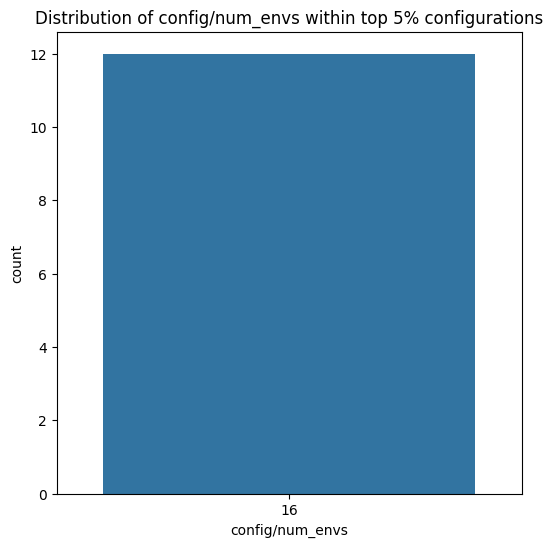

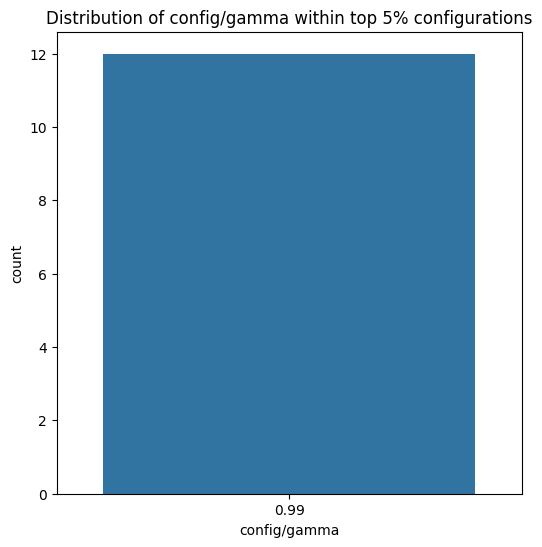

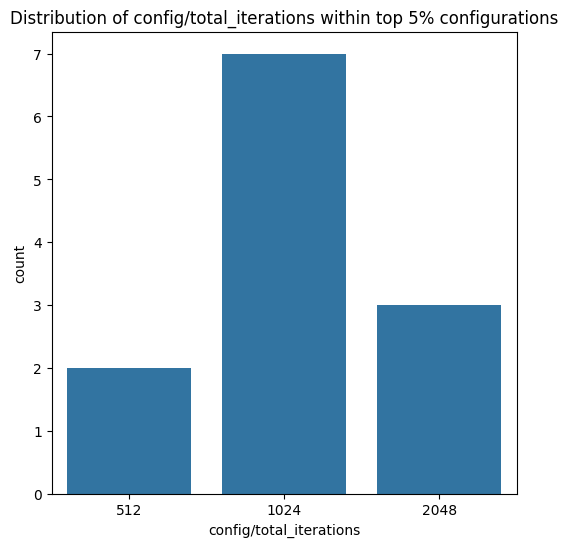

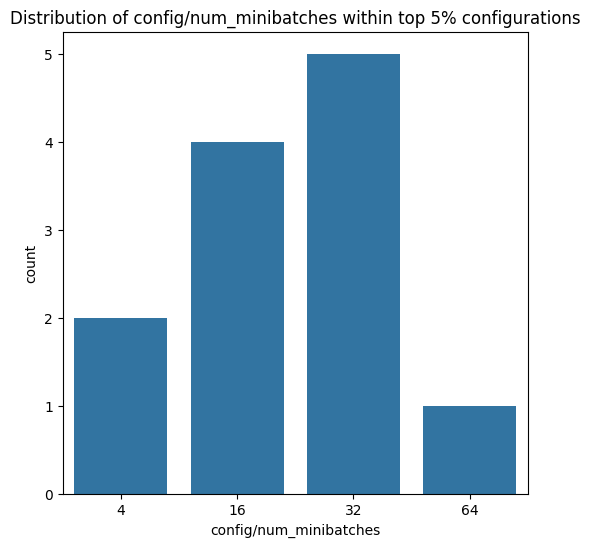

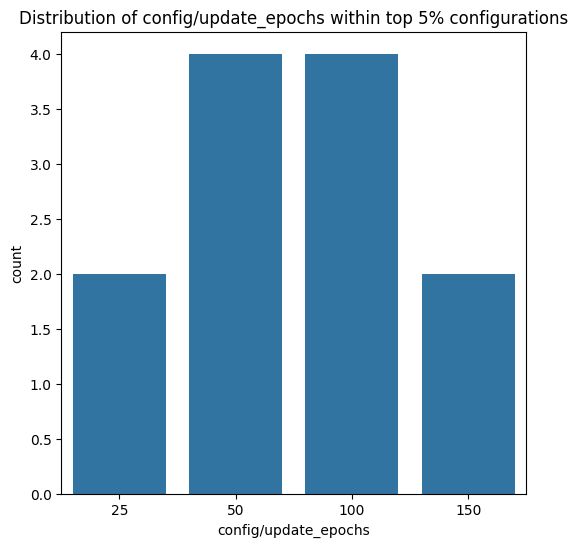

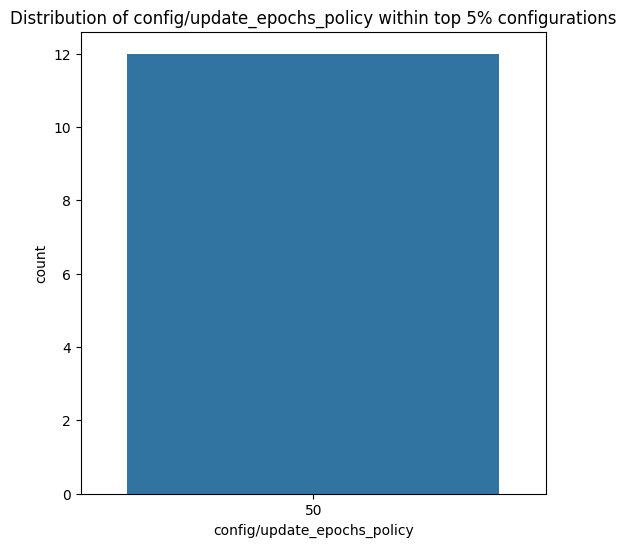

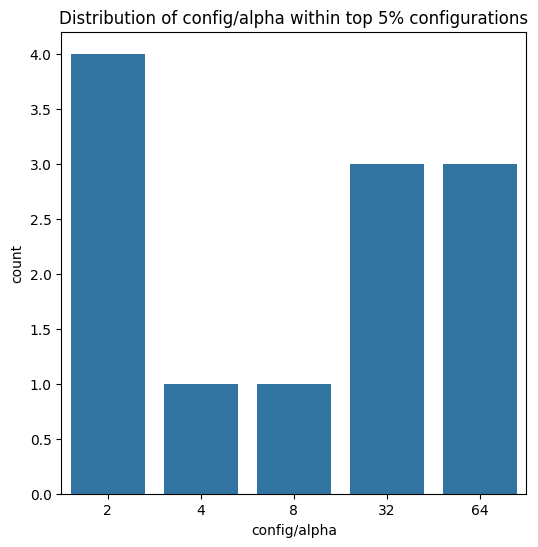

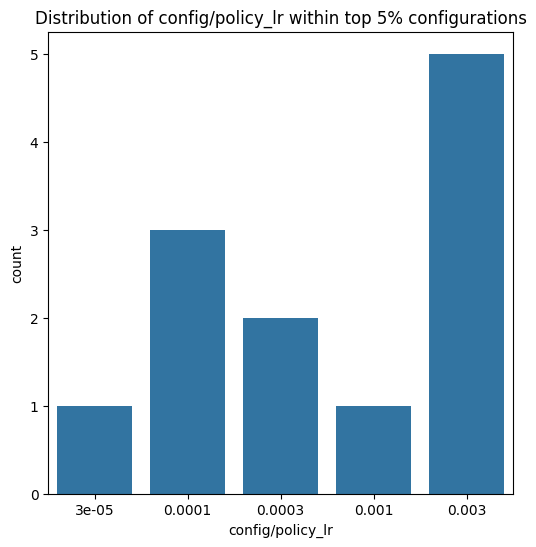

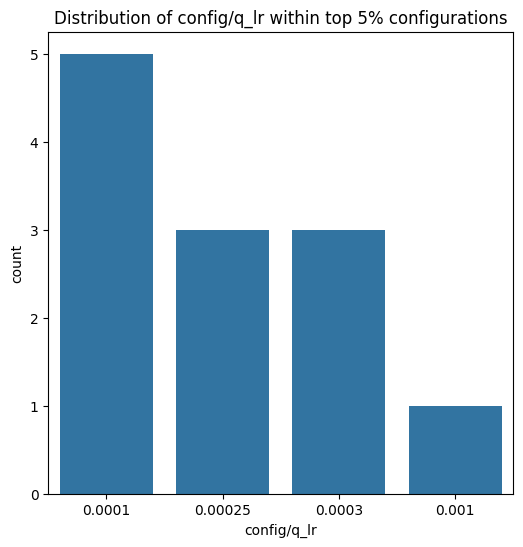

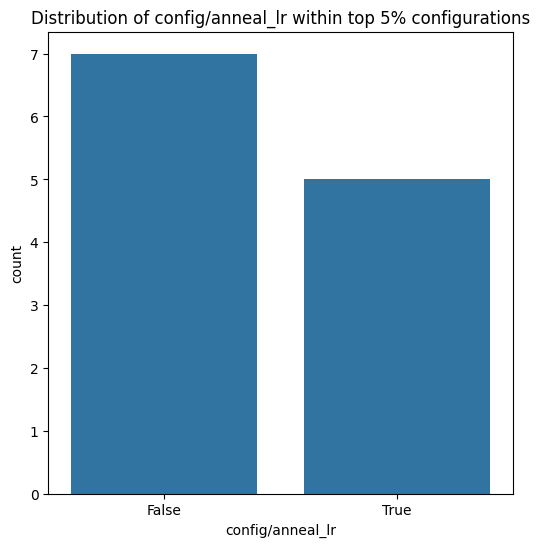

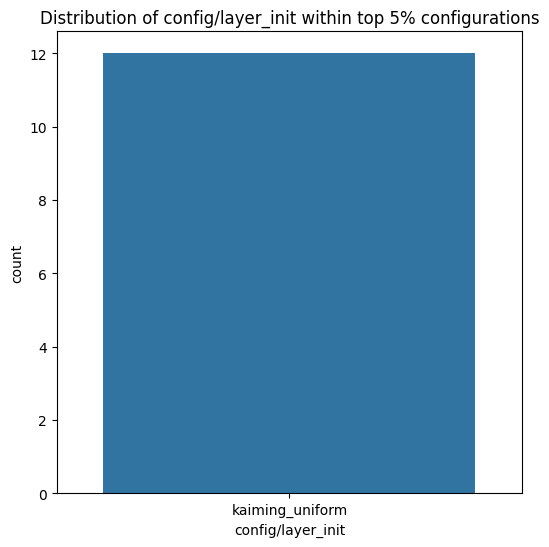

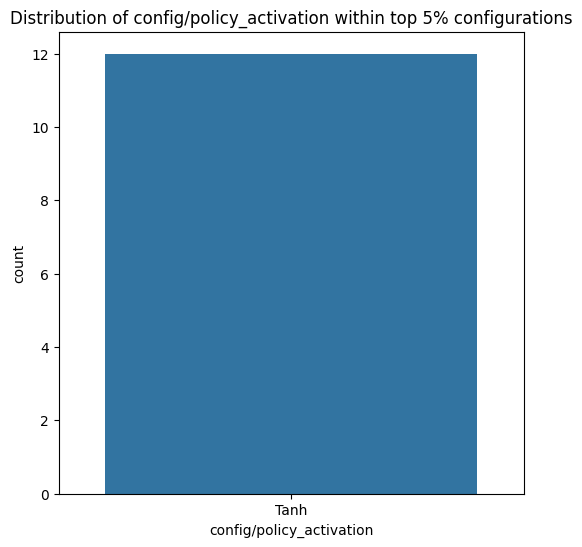

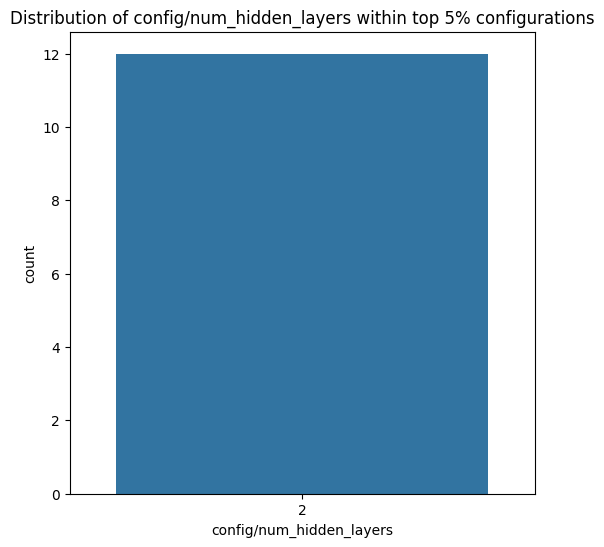

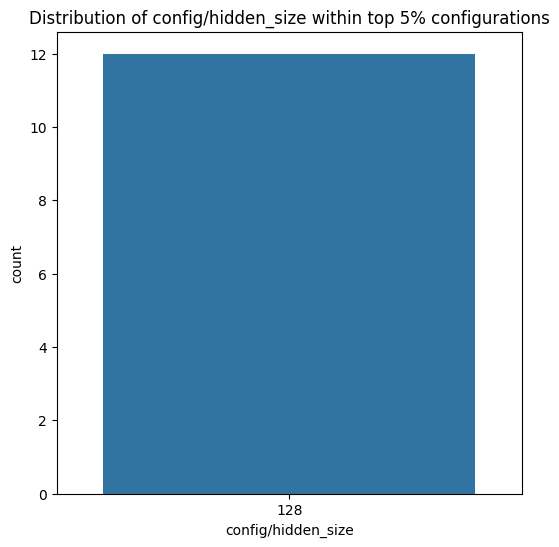

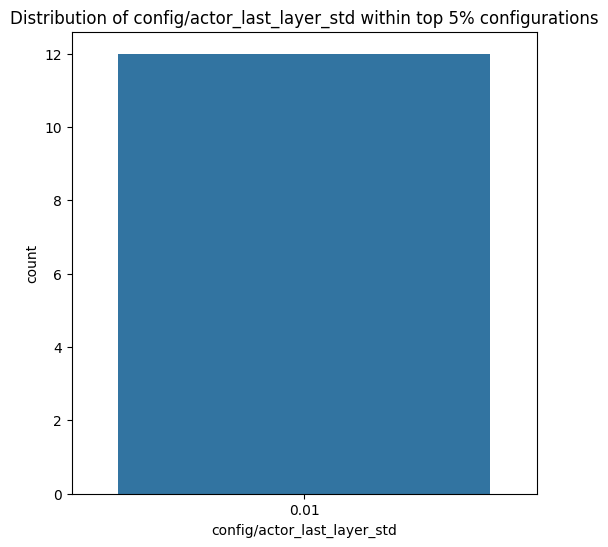

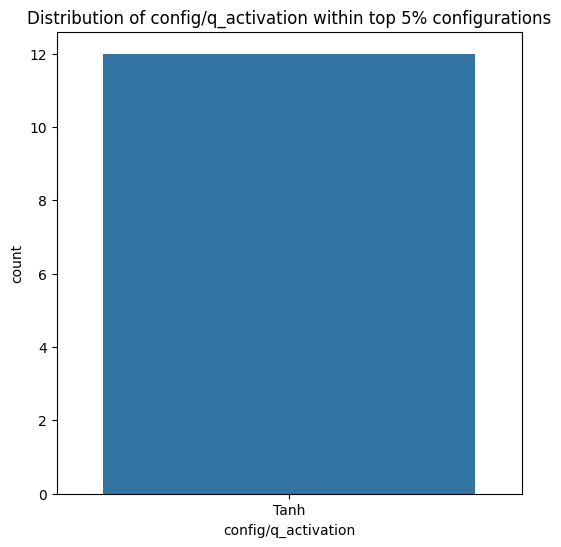

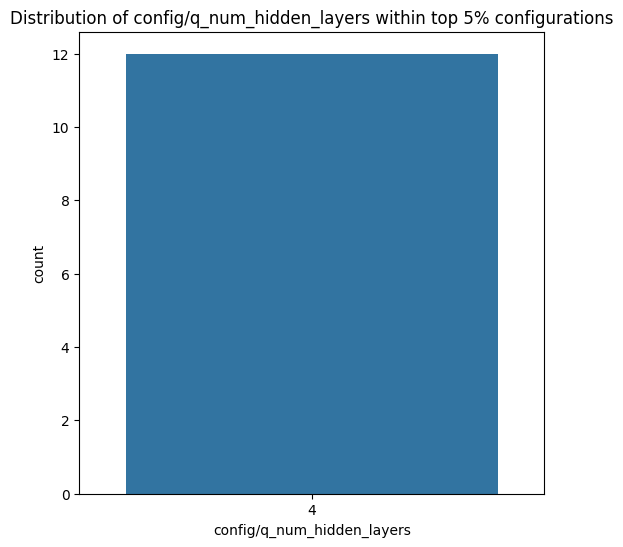

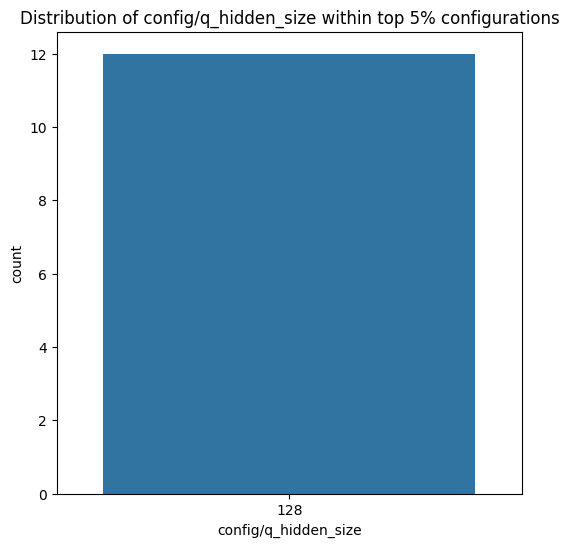

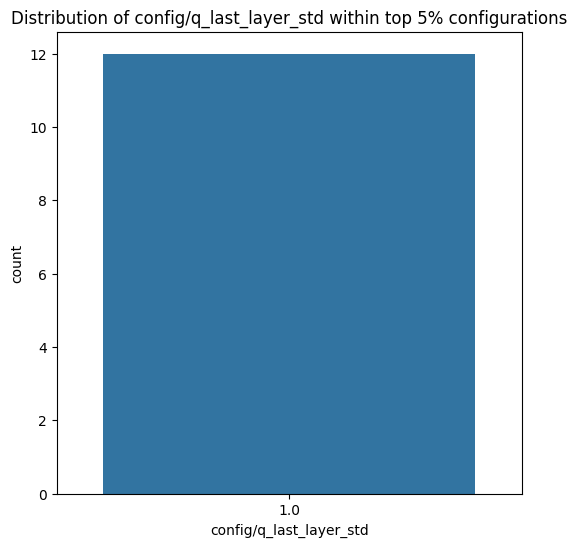

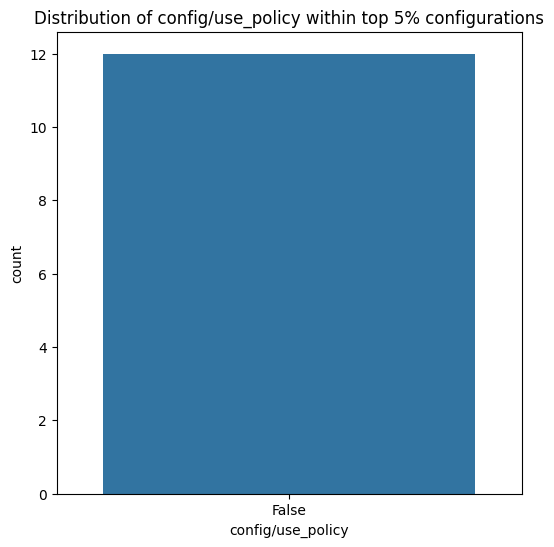

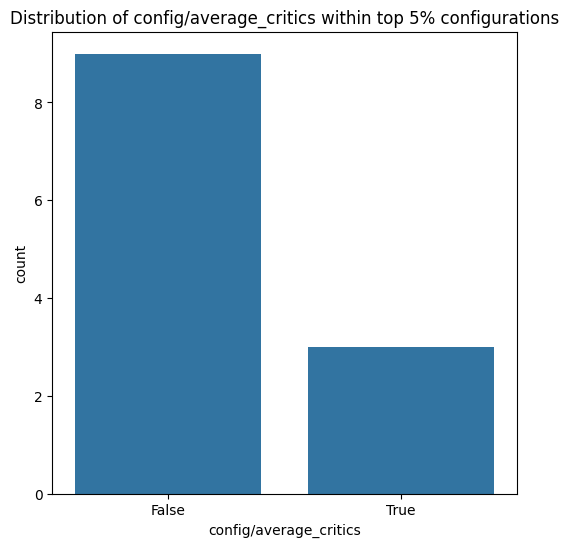

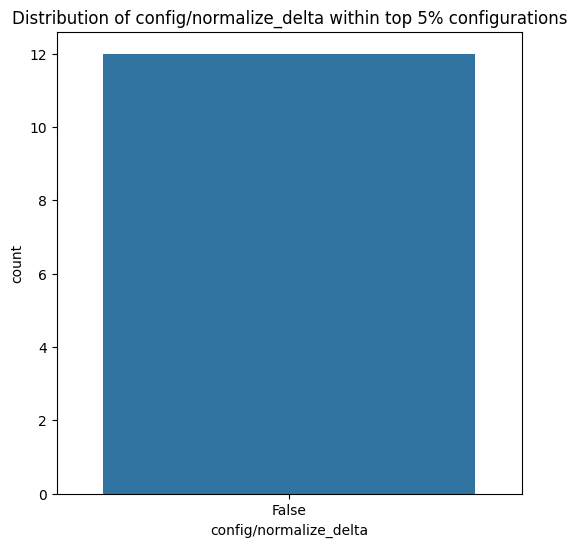

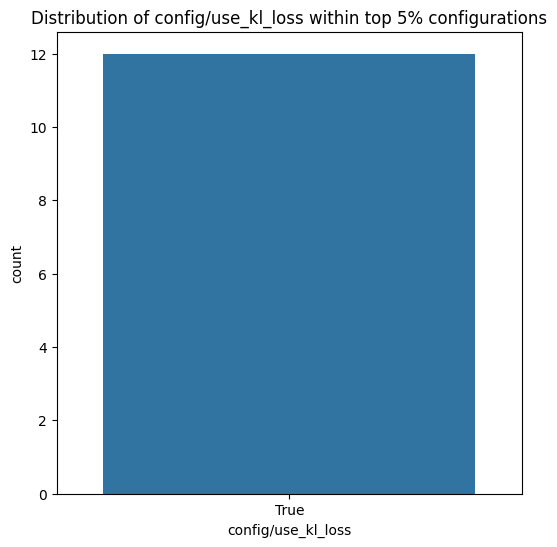

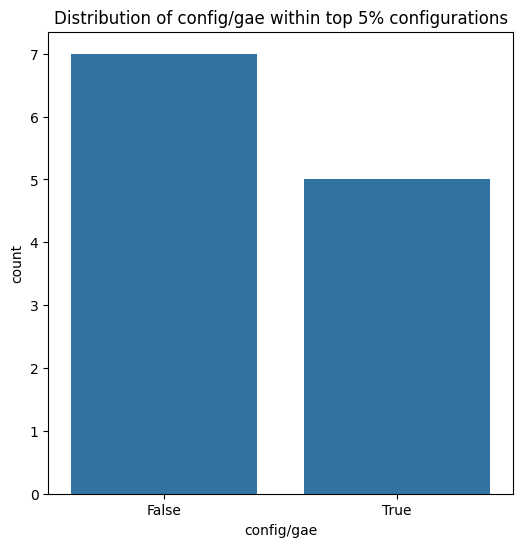

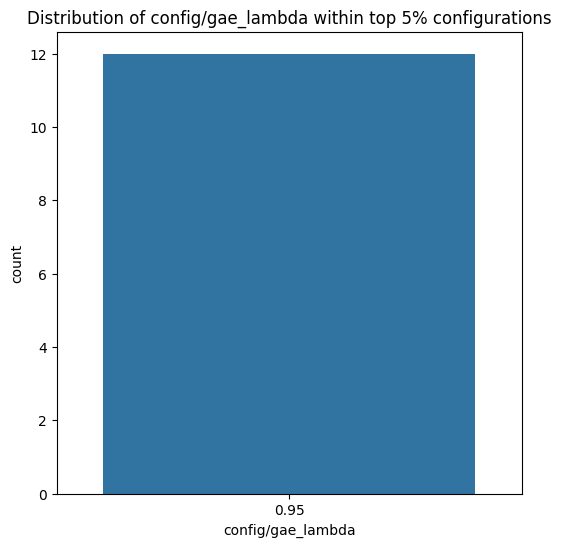

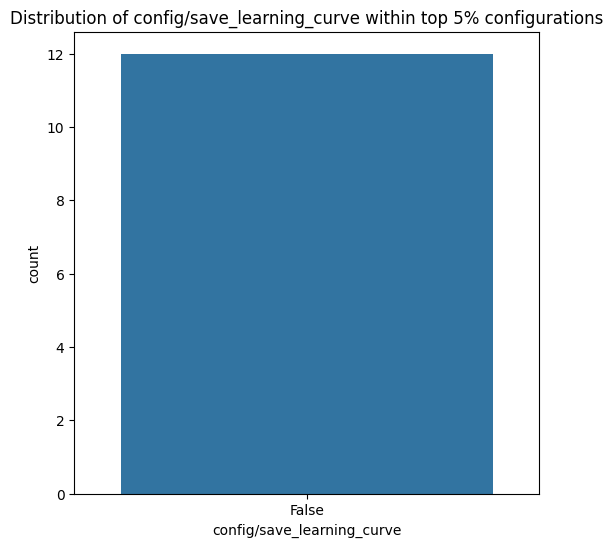

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

df = averages

for col in df.columns:
    if isinstance(df[col].dtype, bool):
        df[col] = df[col].astype(int)

# Get the top 5% configurations
top_5_percent = df.nlargest(int(0.1 * len(df)), 'reward')
top_5_percent.drop(columns=['reward'], inplace=True)
df.drop(columns=['reward'], inplace=True)

# Plot the distribution of choices within top 5% configurations
for column in df.columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=column, data=top_5_percent)
    plt.title(f'Distribution of {column} within top 5% configurations')
    plt.show()


# Episodic return Comparison

## Simple Environments

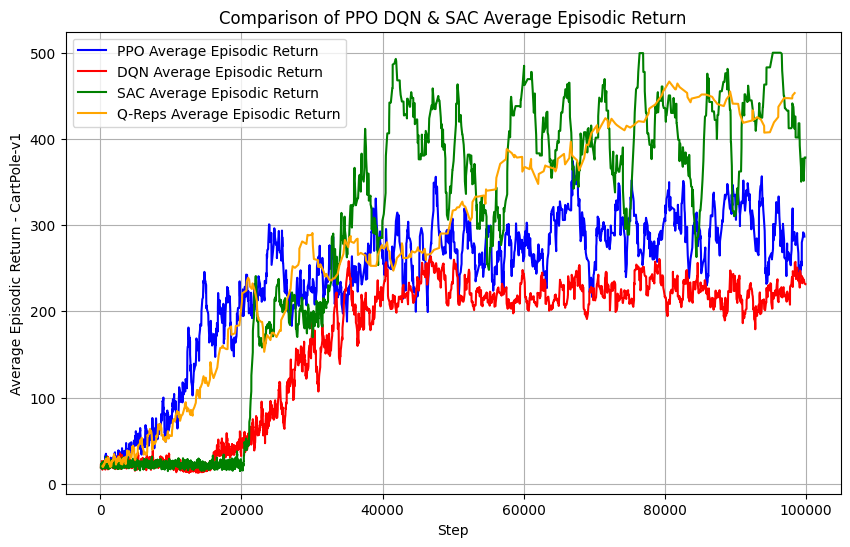

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directories for PPO and DQN data
ppo_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/ppo_runs/cartpole'
dqn_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/dqn_runs/cartpole'
sac_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/sac_runs/cartpole'
qreps_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/qreps_runs/cartpole'

# Function to load CSV files into a DataFrame
def load_data(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

# Load data into DataFrames
ppo_df = load_data(ppo_dir)
dqn_df = load_data(dqn_dir)
sac_df = load_data(sac_dir)
qreps_df = load_data(qreps_dir)

# Calculate average and standard deviation for PPO
ppo_avg_return = ppo_df.groupby('Step')['Reward'].mean().rolling(window=13).mean()
dqn_avg_return = dqn_df.groupby('Step')['Reward'].mean().rolling(window=13).mean()
sac_avg_return = sac_df.groupby('Step')['Reward'].mean().rolling(window=13).mean()
qreps_avg_return = qreps_df.groupby('Step')['Reward'].mean().rolling(window=13).mean()


plt.figure(figsize=(10, 6))

# Plot PPO data
plt.plot(ppo_avg_return.index, ppo_avg_return.values, label='PPO Average Episodic Return', color='blue')
plt.plot(dqn_avg_return.index, dqn_avg_return.values, label='DQN Average Episodic Return', color='red')
plt.plot(sac_avg_return.index, sac_avg_return.values, label='SAC Average Episodic Return', color='green')
plt.plot(qreps_avg_return.index, qreps_avg_return.values, label='Q-Reps Average Episodic Return', color='orange')

plt.xlabel('Step')
plt.ylabel('Average Episodic Return - CartPole-v1')
plt.title('Comparison of PPO DQN & SAC Average Episodic Return')
plt.legend()
plt.grid(True)
plt.show()


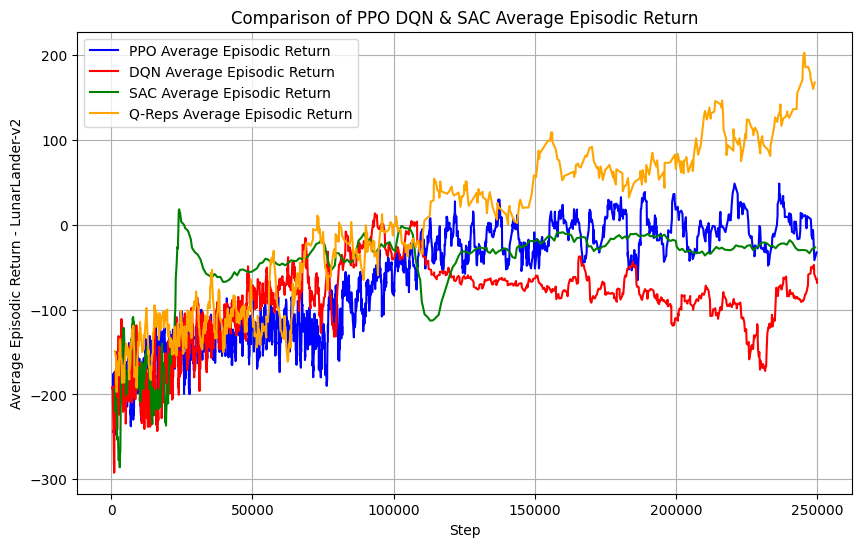

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directories for PPO and DQN data
ppo_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/ppo_runs/lunarlander'
dqn_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/dqn_runs/lunarlander'
sac_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/sac_runs/lunarlander'
qreps_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/qreps_runs/lunarlander'

# Function to load CSV files into a DataFrame
def load_data(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

# Load data into DataFrames
ppo_df = load_data(ppo_dir)
dqn_df = load_data(dqn_dir)
sac_df = load_data(sac_dir)
qreps_df = load_data(qreps_dir)

# Calculate average and standard deviation for PPO
ppo_avg_return = ppo_df.groupby('Step')['Reward'].mean().rolling(window=13).mean()
dqn_avg_return = dqn_df.groupby('Step')['Reward'].mean().rolling(window=13).mean()
sac_avg_return = sac_df.groupby('Step')['Reward'].mean().rolling(window=13).mean()
qreps_avg_return = qreps_df.groupby('Step')['Reward'].mean().rolling(window=13).mean()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(ppo_avg_return.index, ppo_avg_return.values, label='PPO Average Episodic Return', color='blue')
plt.plot(dqn_avg_return.index, dqn_avg_return.values, label='DQN Average Episodic Return', color='red')
plt.plot(sac_avg_return.index, sac_avg_return.values, label='SAC Average Episodic Return', color='green')
plt.plot(qreps_avg_return.index, qreps_avg_return.values, label='Q-Reps Average Episodic Return', color='orange')

plt.xlabel('Step')
plt.ylabel('Average Episodic Return - LunarLander-v2')
plt.title('Comparison of PPO DQN & SAC Average Episodic Return')
plt.legend()
plt.grid(True)
plt.show()